# 5 Modeling<a id='5_Modeling'></a>

## 5.1 Contents<a id='5.1_Contents'></a>
* [5 Modeling](#5_Modeling)
  * [5.1 Contents](#5.1_Contents)
  * [5.2 Introduction](#5.2_Introduction)
  * [5.3 Imports](#5.3_Imports)
  * [5.4 Load Model](#5.4_Load_Model)
  * [5.5 Load Data](#5.5_Load_Data)
  * [5.6 Train Test Split (excluding Big Mountain)](#5.6_TrainTest)
  * [5.7 Model Selection and Evaluation Model](#5.7_Model)
    * [5.7.1 KNN](#5.7.1_KNN)
      * [5.7.1.1 KNN Confusion Matrix](#5.7.1.1_KNN_CM)
      * [5.7.1.2 KNN - ROC Curve](#5.7.1.2_KNN_ROC)
      * [5.7.1.3 KNN - Precision-Recall curve](#5.7.1.3_KNN_PR)
      * [5.7.1.4 KNN - Evaluate](#5.7.1.4_KNN_Evaluate)
    * [5.7.2 Logistic Regression](#5.7.2_LR)
      * [5.7.2.1 Logistic Regression Confusion Matrix](#5.7.2.1_LR_CM)
      * [5.7.2.2 Logistic Regression - ROC Curve](#5.7.2.2_LR_ROC)
      * [5.7.2.3 Logistic Regression - Precision-Recall curve](#5.7.2.3_LR_PR)
      * [5.7.2.4 Logistic Regression - Evaluate](#5.7.2.4_LR_Evaluate)
    * [5.7.3 Random Forest](#5.7.3_RF)
      * [5.7.3.1 Random Forest Confusion Matrix](#5.7.3.1_RF_CM)
      * [5.7.3.2 Random Forest - ROC Curve](#5.7.3.2_RF_ROC)
      * [5.7.3.3 Random Forest - Precision-Recall curve](#5.7.3.3_RF_PR)
      * [5.7.3.4 Random Forest - Evaluate](#5.7.3.4_RF_Evaluate)
    * [5.7.4 Gradient Boosting](#5.7.3_GB)
      * [5.7.3.1 Gradient Boosting Confusion Matrix](#5.7.3.1_GB_CM)
      * [5.7.3.2 Gradient Boosting - ROC Curve](#5.7.3.2_GB_ROC)
      * [5.7.3.3 Gradient Boosting - Precision-Recall curve](#5.7.3.3_GB_PR)
      * [5.7.3.4 Gradient Boosting - Evaluate](#5.7.3.4_GB_Evaluate)      
    * [5.7.5 Neural Network](#5.7.4_NN)
      * [5.7.5.1 Neural Network - Confusion Matrix](#5.7.4.1_NN_CM)
      * [5.7.5.2 Neural Network - ROC Curve](#5.7.4.2_NN_ROC)
      * [5.7.5.3 Neural Network - Precision-Recall curve](#5.7.4.3_NN_PR)
      * [5.7.5.4 Neural Network - Evaluate](#5.7.4.4_NN_Evaluate)
    * [5.7.6 Improved Neural Network](#5.7.5_INN)
      * [5.7.6.1 INN Confusion Matrix](#5.7.5.1_INN_CM)
      * [5.7.6.2 INN - ROC Curve](#5.7.5.2_INN_ROC)
      * [5.7.6.3 INN - Precision-Recall curve](#5.7.5.3_INN_PR)
      * [5.7.6.4 INN - Evaluate](#5.7.5.4_INN_Evaluate)
  * [5.8 Summary](#5.8_Summary)
  * [5.9 Further work](#5.9_Further_work)


## 5.2 Introduction<a id='5.2_Introduction'></a>

## 5.3 Imports<a id='5.3_Imports'></a>

In [9]:
# Import libraries
import os
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_recall_curve, auc, f1_score, ConfusionMatrixDisplay, precision_score
from sklearn.metrics import recall_score, roc_curve, roc_auc_score, accuracy_score, classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

## 5.4 Load Model<a id='5.4_Load_Model'></a>

In [10]:
# This isn't exactly production-grade, but a quick check for development
# These checks can save some head-scratching in development when moving from
# one python environment to another, for example
expected_model_version = '1.0'
model_path = 'amazon_model.pkl'
if os.path.exists(model_path):
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    if model.version != expected_model_version:
        print("Expected model version doesn't match version loaded")
    if model.sklearn_version != sklearn_version:
        print("Warning: model created under different sklearn version")
else:
    print("Expected model not found")

Expected model not found


## 5.5 Load Data<a id='5.5_Load_Data'></a>

In [11]:
amazon_data = pd.read_csv('preprocessed_amazon_data.csv')
amazon_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,...,TokenizedText,TokenizedSummary,LemmatizedText,LemmatizedSummary,StemmedSummary,StemmedText,FakeReviews,TextLength,WordCount,Sentiment
0,165257,B000EVG8J2,A1L01D2BD3RKVO,"B. Miller ""pet person""",0,0,5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...,...,"['tried', 'couple', 'brands', 'glutenfree', 's...","['crunchy', 'good', 'glutenfree', 'sandwich', ...","['tried', 'couple', 'brand', 'glutenfree', 'sa...","['crunchy', 'good', 'glutenfree', 'sandwich', ...","['crunchi', 'good', 'glutenfre', 'sandwich', '...","['tri', 'coupl', 'brand', 'glutenfre', 'sandwi...",0.0,485,84,0.319318
1,231466,B0000BXJIS,A3U62RE5XZDP0G,Marty,0,0,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...,...,"['cat', 'loves', 'treats', 'ever', 'cant', 'fi...","['great', 'kitty', 'treats']","['cat', 'love', 'treat', 'ever', 'cant', 'find...","['great', 'kitty', 'treat']","['great', 'kitti', 'treat']","['cat', 'love', 'treat', 'ever', 'cant', 'find...",0.0,490,99,0.435370
2,427828,B008FHUFAU,AOXC0JQQZGGB6,Kenneth Shevlin,0,2,3,1224028800,COFFEE TASTE,A little less than I expected. It tends to ha...,...,"['little', 'less', 'expected', 'tends', 'muddy...","['coffee', 'taste']","['little', 'le', 'expected', 'tends', 'muddy',...","['coffee', 'taste']","['coffe', 'tast']","['littl', 'less', 'expect', 'tend', 'muddi', '...",0.0,136,28,-0.010833
3,433955,B006BXV14E,A3PWPNZVMNX3PA,rareoopdvds,0,1,2,1335312000,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin...",...,"['first', 'frosted', 'miniwheats', 'original',...","['miniwheats', 'big']","['first', 'frosted', 'miniwheats', 'original',...","['miniwheats', 'big']","['miniwheat', 'big']","['first', 'frost', 'miniwheat', 'origin', 'siz...",0.0,1631,294,0.159401
4,70261,B007I7Z3Z0,A1XNZ7PCE45KK7,Og8ys1,0,2,5,1334707200,Great Taste . . .,and I want to congratulate the graphic artist ...,...,"['want', 'congratulate', 'graphic', 'artist', ...","['great', 'taste']","['want', 'congratulate', 'graphic', 'artist', ...","['great', 'taste']","['great', 'tast']","['want', 'congratul', 'graphic', 'artist', 'pu...",0.0,649,122,0.235565


## 5.6 Train Test Split <a id='5.6_TrainTest'></a>

In [12]:
# Prepare the features and target variable
X = amazon_data.drop(columns=['FakeReviews'])
X = X['LemmatizedText'].apply(lambda x: ' '.join(eval(x)))  # Convert list of words to a single string
y = amazon_data['FakeReviews']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5.7 Vectorization

In [13]:
# Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## 5.8 Model Selection

### 5.8.1 Define Necessary Functions

In [14]:
# Define functions for evaluation and visualization
def confusion_matrix_plot(X_train, y_train, X_test, y_test, y_pred, classifier, classifier_name):
    cm = confusion_matrix(y_pred, y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Fake Review", "Fake Review"])
    disp.plot()
    plt.title(f"Confusion Matrix - {classifier_name}")
    plt.show()
    
    print(f"Accuracy Score Test = {accuracy_score(y_pred, y_test)}")
    print(f"Accuracy Score Train = {classifier.score(X_train, y_train)}")
    return print("\n")

def roc_curve_auc_score(X_test, y_test, y_pred_probabilities, classifier_name):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probabilities)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {roc_auc_score(y_test, y_pred_probabilities):.2f})')
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {classifier_name}')
    plt.legend(loc="lower right")
    plt.show()

def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probabilities)
    plt.plot(recall, precision, label=f"{classifier_name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve for {classifier_name}")
    plt.legend()
    plt.show()

# For logistic regression
def feature_weights(X_df, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False)
    
    top_10_weights = weights[:10]
    plt.figure(figsize=(7,6))
    plt.title(f"{classifier_name} - Top 10 Features")
    top_10_weights.plot(kind="bar")
    
    bottom_10_weights = weights[-10:]
    plt.figure(figsize=(7,6))
    plt.title(f"{classifier_name} - Bottom 10 Features")
    bottom_10_weights.plot(kind="bar")
    print("")

### 5.8.2 Random Forest

In [15]:
# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_tfidf, y_train)
y_pred_rf = rf.predict(X_test_tfidf)
y_pred_rf_prob = rf.predict_proba(X_test_tfidf)[:, 1]

### 5.8.3 Logistic Regression

In [16]:
# Train a Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_tfidf, y_train)
y_pred_log_reg = log_reg.predict(X_test_tfidf)
y_pred_log_reg_prob = log_reg.predict_proba(X_test_tfidf)[:, 1]

## 5.8.4 Support Vector Machine

In [17]:
# Train a Support Vector Machine model
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)
y_pred_svm_prob = svm.predict_proba(X_test_tfidf)[:, 1]

## 5.8.5 Gradient Boosting

In [18]:
# Train a Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train_tfidf, y_train)
y_pred_gb = gb.predict(X_test_tfidf)
y_pred_gb_prob = gb.predict_proba(X_test_tfidf)[:, 1]

## 5.8.6 Neural Network

In [19]:
# Train a Neural Network model
nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn.fit(X_train_tfidf, y_train)
y_pred_nn = nn.predict(X_test_tfidf)
y_pred_nn_prob = nn.predict_proba(X_test_tfidf)[:, 1]

## 5.9 Model Evaluation

### 5.9.1 Random Forest

In [20]:
# Evaluate the models
print("\nRandom Forest Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 0.9998999299509657
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19973
         1.0       1.00      0.85      0.92        13

    accuracy                           1.00     19986
   macro avg       1.00      0.92      0.96     19986
weighted avg       1.00      1.00      1.00     19986

Confusion Matrix:
 [[19973     0]
 [    2    11]]


Random Forest Model:


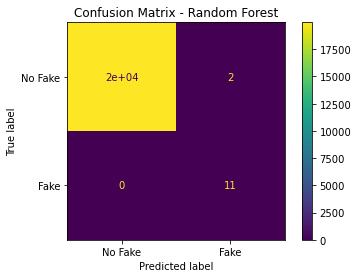

Accuracy Score Test = 0.9998999299509657
Accuracy Score Train = 1.0




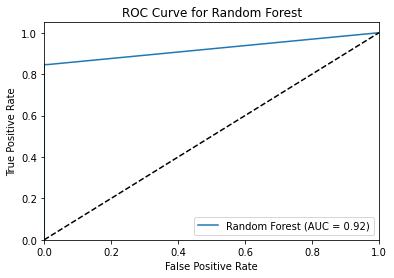

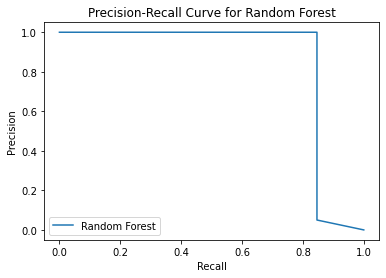

In [21]:
# Evaluate Random Forest model
print("Random Forest Model:")
confusion_matrix_plot(X_train_tfidf, y_train, X_test_tfidf, y_test, y_pred_rf, rf, "Random Forest")
roc_curve_auc_score(X_test_tfidf, y_test, y_pred_rf_prob, "Random Forest")
precision_recall_curve_and_scores(X_test_tfidf, y_test, y_pred_rf, y_pred_rf_prob, "Random Forest")

### 5.9.2 Logistic Regression

In [22]:
# Evaluate the models
print("Logistic Regression Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression Model:
Accuracy: 0.9994496147303112
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19973
         1.0       1.00      0.15      0.27        13

    accuracy                           1.00     19986
   macro avg       1.00      0.58      0.63     19986
weighted avg       1.00      1.00      1.00     19986

Confusion Matrix:
 [[19973     0]
 [   11     2]]


Logistic Regression Model:


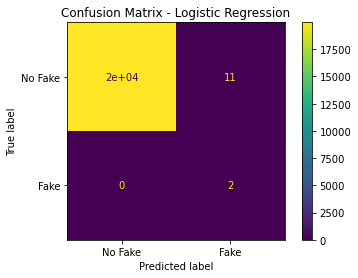

Accuracy Score Test = 0.9994496147303112
Accuracy Score Train = 0.9994746190988467




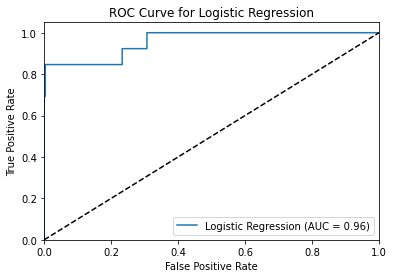

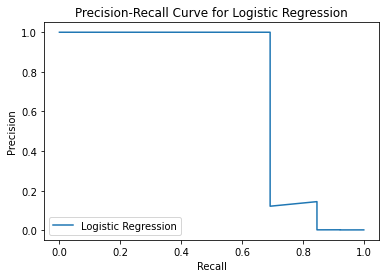

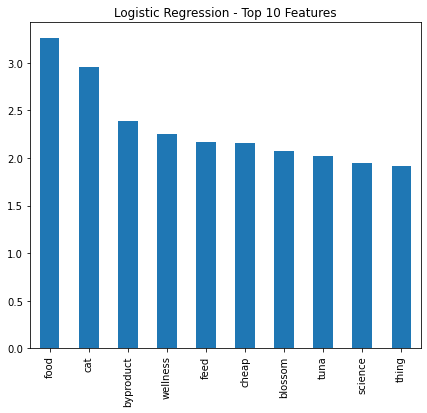

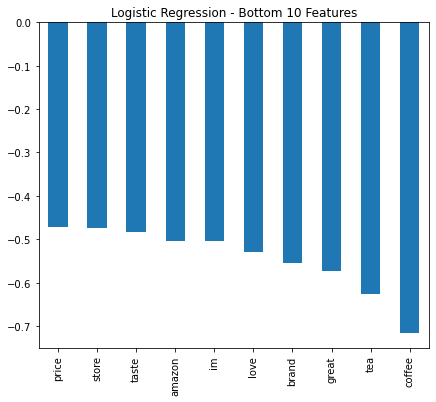

In [23]:
# Evaluate Logistic Regression model
print("Logistic Regression Model:")
confusion_matrix_plot(X_train_tfidf, y_train, X_test_tfidf, y_test, y_pred_log_reg, log_reg, "Logistic Regression")
roc_curve_auc_score(X_test_tfidf, y_test, y_pred_log_reg_prob, "Logistic Regression")
precision_recall_curve_and_scores(X_test_tfidf, y_test, y_pred_log_reg, y_pred_log_reg_prob, "Logistic Regression")
feature_weights(pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out()), log_reg, "Logistic Regression")

In [24]:
## 5.9.4 Support Vector Machine

In [25]:
# Evaluate the models
print("Support Vector Machine Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

Support Vector Machine Model:
Accuracy: 0.9998999299509657
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19973
         1.0       1.00      0.85      0.92        13

    accuracy                           1.00     19986
   macro avg       1.00      0.92      0.96     19986
weighted avg       1.00      1.00      1.00     19986

Confusion Matrix:
 [[19973     0]
 [    2    11]]


Support Vector Machine Model:


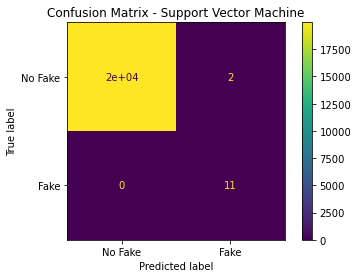

Accuracy Score Test = 0.9998999299509657
Accuracy Score Train = 0.9999374546546246




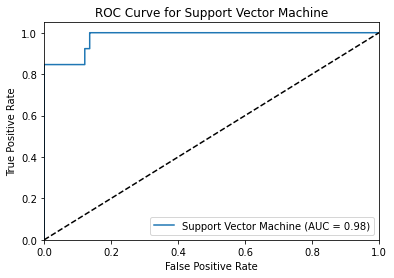

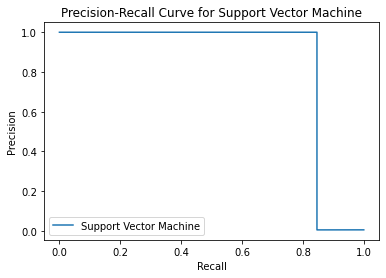

In [26]:
# Evaluate Support Vector Machine
print("Support Vector Machine Model:")
confusion_matrix_plot(X_train_tfidf, y_train, X_test_tfidf, y_test, y_pred_svm, svm, "Support Vector Machine")
roc_curve_auc_score(X_test_tfidf, y_test, y_pred_svm_prob, "Support Vector Machine")
precision_recall_curve_and_scores(X_test_tfidf, y_test, y_pred_svm, y_pred_svm_prob, "Support Vector Machine")


In [27]:
## 5.9.5 Gradient Boosting

In [28]:
# Evaluate the models
print("Gradient Boosting Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Gradient Boosting Model:
Accuracy: 0.9995997198038628
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19973
         1.0       0.69      0.69      0.69        13

    accuracy                           1.00     19986
   macro avg       0.85      0.85      0.85     19986
weighted avg       1.00      1.00      1.00     19986

Confusion Matrix:
 [[19969     4]
 [    4     9]]


Gradient Boosting Model:


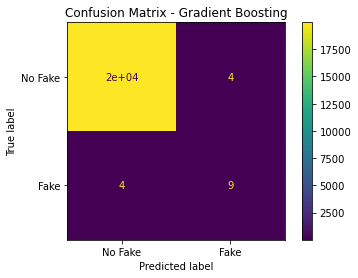

Accuracy Score Test = 0.9995997198038628
Accuracy Score Train = 0.9998123639638739




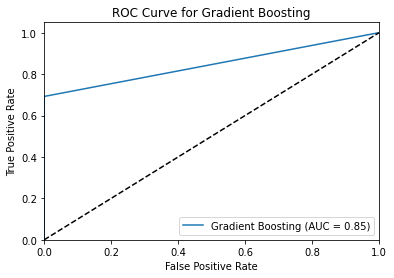

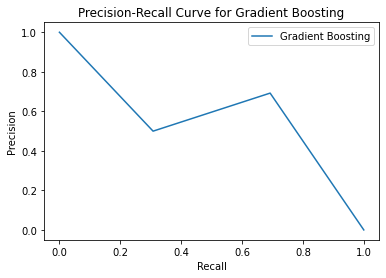

In [29]:
# Evaluate Gradient Boosting
print("Gradient Boosting Model:")
confusion_matrix_plot(X_train_tfidf, y_train, X_test_tfidf, y_test, y_pred_gb, gb, "Gradient Boosting")
roc_curve_auc_score(X_test_tfidf, y_test, y_pred_gb_prob, "Gradient Boosting")
precision_recall_curve_and_scores(X_test_tfidf, y_test, y_pred_gb, y_pred_gb_prob, "Gradient Boosting")

In [30]:
## 5.9.6 Neural Network

In [31]:
# Evaluate the models
print("Neural Network Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Classification Report:\n", classification_report(y_test, y_pred_nn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))

Neural Network Model:
Accuracy: 0.9998999299509657
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19973
         1.0       1.00      0.85      0.92        13

    accuracy                           1.00     19986
   macro avg       1.00      0.92      0.96     19986
weighted avg       1.00      1.00      1.00     19986

Confusion Matrix:
 [[19973     0]
 [    2    11]]


Neural Network Model:


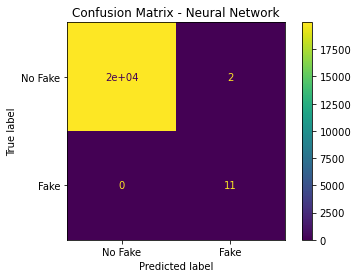

Accuracy Score Test = 0.9998999299509657
Accuracy Score Train = 1.0




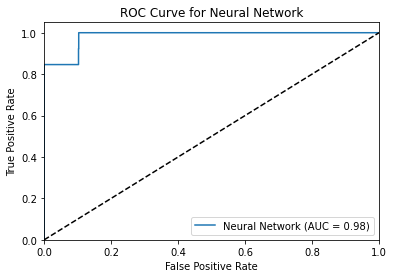

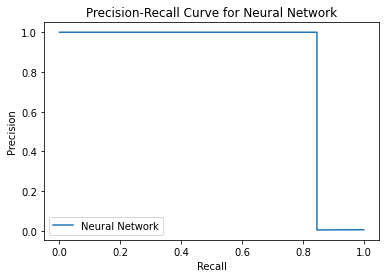

In [32]:
# Evaluate Neural Network
print("Neural Network Model:")
confusion_matrix_plot(X_train_tfidf, y_train, X_test_tfidf, y_test, y_pred_nn, nn, "Neural Network")
roc_curve_auc_score(X_test_tfidf, y_test, y_pred_nn_prob, "Neural Network")
precision_recall_curve_and_scores(X_test_tfidf, y_test, y_pred_nn, y_pred_nn_prob, "Neural Network")


In [ ]:
# Save the models for future use
joblib.dump(log_reg, 'logistic_regression_model.pkl')
joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(svm, 'svm_model.pkl')
joblib.dump(gb, 'gradient_boosting_model.pkl')
joblib.dump(nn, 'neural_network_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer

## 5.8 Summary <a id='5.8_Summary'></a>

## 5.9 Further work <a id='5.9_Further_work'></a>